In [1]:
# Importing libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 

In [2]:
# # To display graphs in a notebook without the need to specially "call" them.

%matplotlib inline

In [3]:
path = r'C:\Users\iryna\Documents\11.08.2024 Boat Sales Analysis'

In [4]:
boats = pd.read_csv(os.path.join(path,'02 Data','Prepared Data', 'boats6.2.csv'))


In [5]:
boats.head()



,Unnamed: 0,Boat Type,Manufacturer,"Condition, engine type",Year Built,Length,Width,Material,Number of views last 7 days,currency,value,value_in_eur,Country,Price category
0,0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,226,CHF,3337,3337.0,Switzerland,Low price
1,1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,EUR,3490,3490.0,Germany,Low price
2,2,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,124,CHF,3770,3770.0,Switzerland,Low price
3,3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,64,DKK,25900,3367.0,Denmark,Low price
4,4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,EUR,3399,3399.0,Germany,Low price


In [6]:
boats.drop(columns = ['Unnamed: 0'], inplace=True)

In [7]:
boats.head()


,Boat Type,Manufacturer,"Condition, engine type",Year Built,Length,Width,Material,Number of views last 7 days,currency,value,value_in_eur,Country,Price category
0,Motor Yacht,Rigiflex power boats,new boat from stock,2017,4.00,1.90,NaN,226,CHF,3337,3337.0,Switzerland,Low price
1,Center console boat,Terhi power boats,new boat from stock,2020,4.00,1.50,Thermoplastic,75,EUR,3490,3490.0,Germany,Low price
2,Sport Boat,Marine power boats,new boat from stock,0,3.69,1.42,Aluminium,124,CHF,3770,3770.0,Switzerland,Low price
3,Sport Boat,Pioner power boats,new boat from stock,2020,3.00,1.00,NaN,64,DKK,25900,3367.0,Denmark,Low price
4,Fishing Boat,Linder power boats,new boat from stock,2019,3.55,1.46,Aluminium,58,EUR,3399,3399.0,Germany,Low price


### The elbow technique

In [9]:
boats.isnull().sum()

Boat Type                         0
Manufacturer                   1338
Condition, engine type            6
Year Built                        0
Length                            9
Width                            56
Material                       1749
Number of views last 7 days       0
currency                          0
value                             0
value_in_eur                    298
Country                          36
Price category                  302
dtype: int64

##### Missing values in column ​​'Length' and column 'Width' will be replaced by medians.


In [11]:
# Calculating the medians of the data set.

boats['Length'].median()

10.28

In [12]:
boats['Width'].median()

3.33

In [13]:
boats['Length'].fillna('10.28', inplace=True)
boats['Width'].fillna('3.33', inplace=True)

C:\Users\iryna\AppData\Local\Temp\ipykernel_25468\1606427100.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  boats['Length'].fillna('10.28', inplace=True)
C:\Users\iryna\AppData\Local\Temp\ipykernel_25468\1606427100.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '10.28' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  boats['Length'].fillna('10.28', inplace=True)
C:\Users\iryna\AppData\Local\Temp

In [14]:
boats.isnull().sum()


Boat Type                         0
Manufacturer                   1338
Condition, engine type            6
Year Built                        0
Length                            0
Width                             0
Material                       1749
Number of views last 7 days       0
currency                          0
value                             0
value_in_eur                    298
Country                          36
Price category                  302
dtype: int64

In [15]:
# Filtering column 'value_in_eur' (selecting values without NaNs)
# As input X contains NaN - KMeans does not accept missing values encoded as NaN natively.

filtered_boats = boats[boats['value_in_eur'].notnull()]


In [16]:
# Checking output

filtered_boats['value_in_eur'].value_counts(dropna=False)


value_in_eur
65000.0      80
45000.0      74
35000.0      69
89000.0      67
75000.0      67
             ..
1339000.0     1
1349000.0     1
1369000.0     1
1371535.0     1
3780.0        1
Name: count, Length: 2570, dtype: int64

In [17]:
# Checking for missing values after replacing

filtered_boats.isnull().sum()

Boat Type                         0
Manufacturer                   1321
Condition, engine type            6
Year Built                        0
Length                            0
Width                             0
Material                       1682
Number of views last 7 days       0
currency                          0
value                             0
value_in_eur                      0
Country                          33
Price category                    4
dtype: int64

In [18]:
# Creating a subset excluding the 'Boat Type', 'Manufacturer', 'Condition, engine type', 'Material' , 'currency', 'value' , 'Country' columns

sub1 = filtered_boats[['Year Built', 'Length', 'Width', 'Number of views last 7 days', 'value_in_eur']]


In [19]:
sub1.isnull().sum()

Year Built                     0
Length                         0
Width                          0
Number of views last 7 days    0
value_in_eur                   0
dtype: int64

### The elbow technique


In [21]:
# Defining the range of potential clusters in the data and  k-means clusters in the assigned range.

num_cl = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [22]:
# Creating a score that represents a rate of variation for the given cluster option.

score = [kmeans[i].fit(sub1).score(sub1) for i in range(len(kmeans))]

In [23]:
score

[-8482089067666926.0,
 -3388781519154053.5,
 -1850431315599668.2,
 -1139638531536441.8,
 -781801492671270.6,
 -539766823355722.56,
 -352876547856343.25,
 -267415561356515.6,
 -231037191923731.88]

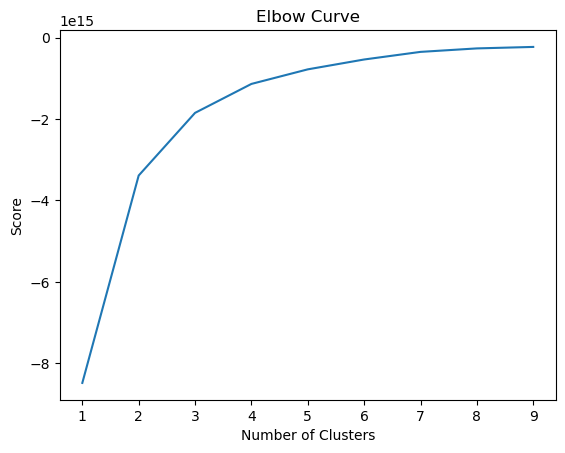

In [24]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

##### There is a jump from two to three on the x-axis, but after that we still see the line bend up to 5 and after the curve straightens out. The optimal count for clusters is 4.

###  k-means clustering

In [27]:
# Creating the k-means object.

kmeans = KMeans(n_clusters = 4)

In [28]:
# Fitting the k-means object to the data.

kmeans.fit(sub1)

KMeans(n_clusters=4)

In [29]:
sub1['clusters'] = kmeans.fit_predict(sub1)

C:\Users\iryna\AppData\Local\Temp\ipykernel_25468\726227404.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub1['clusters'] = kmeans.fit_predict(sub1)


In [30]:
sub1.head(20)

,Year Built,Length,Width,Number of views last 7 days,value_in_eur,clusters
0,2017,4.0,1.9,226,3337.0,0
1,2020,4.0,1.5,75,3490.0,0
2,0,3.69,1.42,124,3770.0,0
3,2020,3.0,1.0,64,3367.0,0
4,2019,3.55,1.46,58,3399.0,0
5,0,4.03,1.56,132,3650.0,0
6,1999,6.2,2.38,474,3600.0,0
7,0,3.0,3.33,134,3224.0,0
8,2019,3.64,1.37,45,3333.0,0
9,2018,4.35,1.73,180,3300.0,0


In [31]:
sub1['clusters'].value_counts()

clusters
0    9172
2     355
3      53
1      10
Name: count, dtype: int64

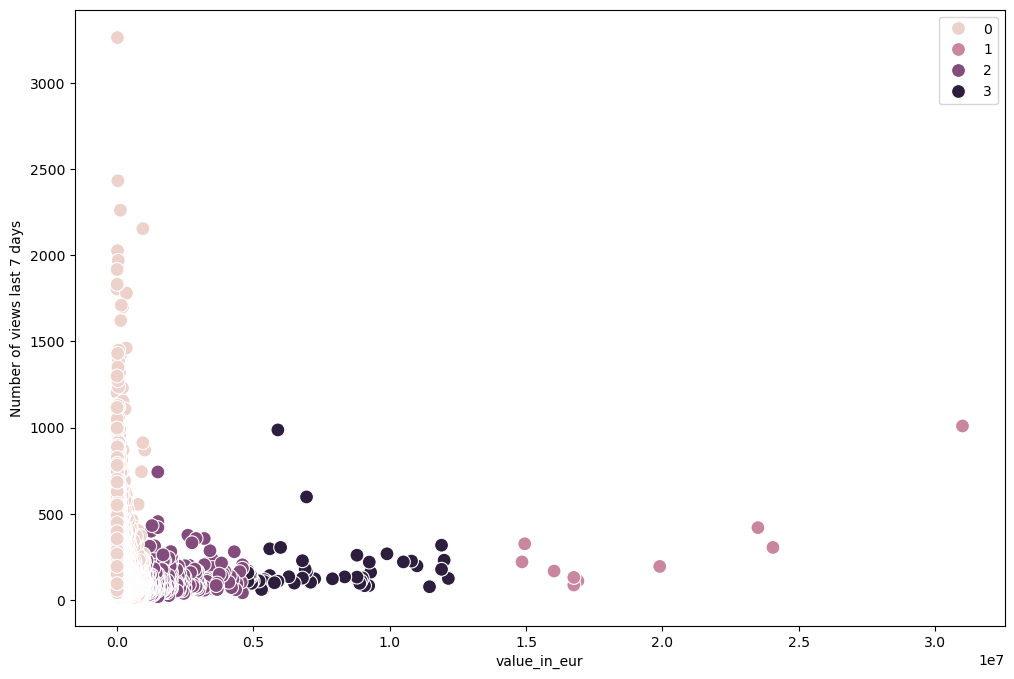

In [32]:
# Plot the clusters for the "value_in_eur" and "Number of views last 7 days" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub1['value_in_eur'], y=sub1['Number of views last 7 days'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('value_in_eur')
plt.ylabel('Number of views last 7 days')
plt.show()

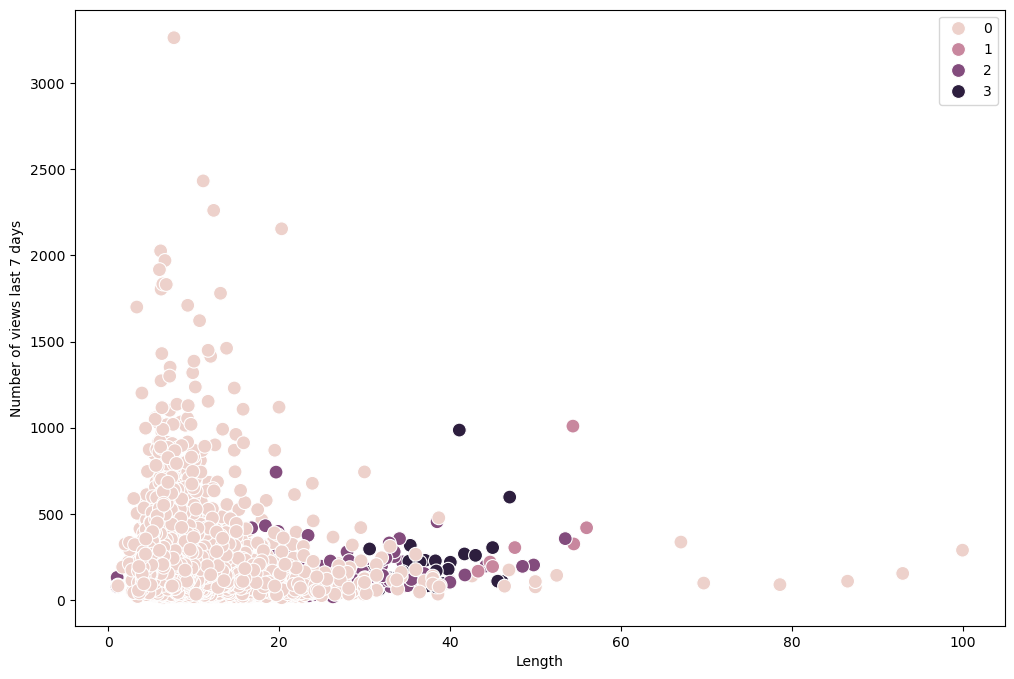

In [66]:
# Plot the clusters for the "value_in_eur" and "Number of views last 7 days" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub1['Length'], y=sub1['Number of views last 7 days'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('Length')
plt.ylabel('Number of views last 7 days')
plt.show()

In [82]:
# Changing data type for column 'Length' since the object data type does not allow the grouping function.

In [72]:
sub1.dtypes

Year Built                       int64
Length                          object
Width                           object
Number of views last 7 days      int64
value_in_eur                   float64
clusters                         int32
cluster                         object
dtype: object

In [74]:
sub1['Length']=sub1['Length'].astype('float64')

C:\Users\iryna\AppData\Local\Temp\ipykernel_25468\3013986325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub1['Length']=sub1['Length'].astype('float64')


In [76]:
sub1.dtypes

Year Built                       int64
Length                         float64
Width                           object
Number of views last 7 days      int64
value_in_eur                   float64
clusters                         int32
cluster                         object
dtype: object

In [84]:
# Conducting descriptive analysis with clusters to check each of their individual statistics.

In [68]:
sub1.loc[sub1['clusters'] == 3, 'cluster'] = 'dark purple'
sub1.loc[sub1['clusters'] == 2, 'cluster'] = 'purple'
sub1.loc[sub1['clusters'] == 1, 'cluster'] = 'pink'
sub1.loc[sub1['clusters'] == 0, 'cluster'] = 'light pink'

In [80]:
sub1.groupby('cluster').agg({'Number of views last 7 days':['mean', 'median'],
                         'value_in_eur':['mean', 'median'],
                         'Length':['mean', 'median']})

Number of views last 7 days         value_in_eur              \
                                   mean median          mean      median   
cluster                                                                    
dark purple                  170.849057  127.0  7.326129e+06   6800000.0   
light pink                   152.052006  109.0  1.605567e+05     85000.0   
pink                         296.400000  207.0  1.946750e+07  16825000.0   
purple                       112.828169   94.0  1.910714e+06   1681875.0   

                Length         
                  mean median  
cluster                        
dark purple  34.110189  34.53  
light pink   10.844839   9.98  
pink         45.810000  44.85  
purple       23.319324  22.55

##### The pink cluster has the biggest Median 'Number of views' (207.0), 'Value'(16,825,000.0) and 'Length'(44.85) of boats.
##### Dark purple cluster is the second cluster - in terms of the value of the variables: Median  'Number of views' (127.0), 'Value' (6,800,000.0) and 'Length' (34.53).
##### In these 2 clusters we see some dependence, the greater the 'Value' and 'Length' of the boat, the more 'Number of views' it has.



#####  Looking at the 'Numbers of views', as well as the 'Value' of the boat and 'Length in other 2 clusters (Light pink and Purple)', we can say that Light pink cluster at the lowest 'Value' and 'Length' has a higher 'View' rate than the Purple cluster at larger values of 'View' and 'Length'.
#### Returning to the formulation of the hypothesis - "The higher the price of the boat, the less it receives views from customers", can say that  we cannot claim this statement for boats that have a large 'Value' (prices), only for boats with a lower 'Value' (less than 6,800,000.0 Euro).

##### So we cannot assert this assumptions for all boats and therefore the dependence of the price and views is not linear for all boats.



In [98]:
# Exporting dataframe

sub1.to_csv(os.path.join(path, '02 Data','Prepared Data', 'sub1.csv'))